# IE30301 DataMining  Programming HW4

### Import Packages
- It is not allowed for you to use packages other than specific packages below
- It is not nessasary to use all the packages below 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

## Task 1. Random Forest Training and evaluation [20 points]

#### 1.1 Load Dataset [1 points]
- Load the csv file,'breast_cancer.csv'
- Assign `X` to the independent variable dataset
- Assign `y` to the target variable dataset

In [3]:
df = pd.read_csv("breast_cancer.csv")
X = df.drop('target', axis = 1)
y = df['target']

#### 1.2 Split Dataset into the train & test set [1 points]
** When you use scikit-learn method to split the train & test set : 
- The `random_state` value has to be zero
- The ratio of train set and test set is as follows : 70% train set / 30% test set
- Assign the variable names as follow : `X_train`, `X_test`, `y_train`, `y_test`

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 0)

#### 1.3 Preprocess the data (use standard scaling) [2 points]
- Use the method as the default state


In [5]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

#### 1.4 Load and train a random forest model by scikit-learn [4 points]
- The `random_state` value has to be zero
- Train the model as the default state
- You should complete the training on both the unscaled original data and the scaled data (Use two different model names: model_origin, model_scaled)

In [6]:
# First model trained with original datasets (without any scaling)
model_origin = RandomForestClassifier(random_state = 0)
model_origin.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [7]:
# Second model trained with scaled datasets (with standard scaling) 
model_scaled = RandomForestClassifier(random_state = 0)
model_scaled.fit(X_train_norm,y_train)

RandomForestClassifier(random_state=0)

#### 1.5 Predict and evaluate the model [12 points]
- Make predictions and evaluations for the two models(model_origin, model_scaled) that have been trained in 1.4, respectively.
- Print the predicted labels of test set and assign it to two different variables (y_pred_origin, y_pred_scaled)
- Complete the four evaluation functions below, and evaluate the model performance through them

In [8]:
def cal_confusion(y_true, y_pred):
    
    """
    Calculate the confusion matrix from the predicted target value and the actual target value.
    
    Inputs
    ------
    y_true: actual target value
    y_pred: predicted target value

    Outputs
    -------
    confusion matrix components: TP, FP, TN, FN

    """
    # TODO: Compute the compusion matrix
    
    sample_num = len(y_true)
    TP = TN = FP = FN = 0
    for i in range(0, sample_num):
        if y_pred[i] == 0 and y_true[i] == 0:
            TN += 1
        elif y_pred[i] == 0 and y_true[i] == 1:
            FN += 1
        elif y_pred[i] == 1 and y_true[i] == 0:
            FP += 1
        else:
            TP += 1

    return TP, FP, TN, FN

In [9]:
def cal_accuracy(y_true, y_pred):
    
    """
    Calculate the accuracy rate from the predicted target value and the actual target value.
    
    Inputs
    ------
    y_true: actual target value
    y_pred: predicted target value

    Outputs
    -------
    calculataed accuracy rate

    """
    # TODO: Compute the accuracy rate
    
    TP, FP, TN, FN = cal_confusion(y_true, y_pred)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return accuracy

In [10]:
def cal_sensitivity(TP,FP,TN,FN):
    
    """
    Calculate the sensitivity using the TP, FP, TN, and FN information obtained through the confusion matrix.    
    
    Inputs
    ------
    TP,FP,TN,FN

    Outputs
    -------
    calculated sensitivity rate

    """
    # TODO: Compute the sensitivity rate
    
    sensitivity = TP / (TP + FN)
    
    return sensitivity

In [11]:
def cal_specificity(TP,FP,TN,FN):
    
    """
    Calculate the sensitivity using the TP, FP, TN, and FN information obtained through the confusion matrix.    
    
    Inputs
    ------
    TP,FP,TN,FN

    Outputs
    -------
    calculated specificity rate

    """
    # TODO: Compute the specificity rate
    
    specificity = TN / (TN + FP)
    
    return specificity

In [12]:
# y_pred_origin, y_pred_scaled
y_pred_origin = model_origin.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_norm)

In [13]:
# Get results of 'cal_confusion'
TP_origin, FP_origin, TN_origin, FN_origin = cal_confusion(np.array(y_test), y_pred_origin)
TP_scaled, FP_scaled, TN_scaled, FN_scaled = cal_confusion(np.array(y_test), y_pred_scaled)

In [14]:
# Should fill in the {}
print(f'TP, FP, TN , FN when original dataset was used... : {TP_origin}, {FP_origin}, {TN_origin}, {FN_origin}')
print(f'TP, FP, TN , FN when scaling dataset was used... : {TP_scaled}, {FP_scaled}, {TN_scaled}, {FN_scaled}')

TP, FP, TN , FN when original dataset was used... : 104, 3, 60, 4
TP, FP, TN , FN when scaling dataset was used... : 104, 3, 60, 4


In [15]:
# Get results of 'cal_accuracy'
result_origin = cal_accuracy(np.array(y_test), y_pred_origin)
result_scaled = cal_accuracy(np.array(y_test), y_pred_scaled)

In [16]:
# Should fill in the {}
print(f'Model accuracy when original dataset was used... : {result_origin}')
print(f'Model accuracy when scaling  dataset was used... : {result_scaled}')

Model accuracy when original dataset was used... : 0.9590643274853801
Model accuracy when scaling  dataset was used... : 0.9590643274853801


In [17]:
# Get results of 'cal_sensitivity'
sensitivity_origin = cal_sensitivity(TP_origin,FP_origin,TN_origin,FN_origin)
sensitivity_scaled = cal_sensitivity(TP_scaled,FP_scaled,TN_scaled,FN_scaled)

In [18]:
# Should fill in the {}
print(f'Model sensitivity when original dataset was used... : {sensitivity_origin}')
print(f'Model sensitivity when scaling  dataset was used... : {sensitivity_scaled}')

Model sensitivity when original dataset was used... : 0.9629629629629629
Model sensitivity when scaling  dataset was used... : 0.9629629629629629


In [19]:
# Get results of 'cal_specificity'
specificity_origin = cal_specificity(TP_origin,FP_origin,TN_origin,FN_origin)
specificity_scaled = cal_specificity(TP_scaled,FP_scaled,TN_scaled,FN_scaled)

In [20]:
# Should fill in the {}
print(f'Model specificity when original dataset was used... : {specificity_origin}')
print(f'Model specificity when scaling  dataset was used... : {specificity_scaled}')

Model specificity when original dataset was used... : 0.9523809523809523
Model specificity when scaling  dataset was used... : 0.9523809523809523


## Task 2. Feature Importance Prediction [10 points]
- The corresponding task also should be performed for each of the two previously trained models
- For this task, you should use the 'feature_importances_' function of RandomForestClassifier
- Find the top 20 variables with high variable importance and plot them

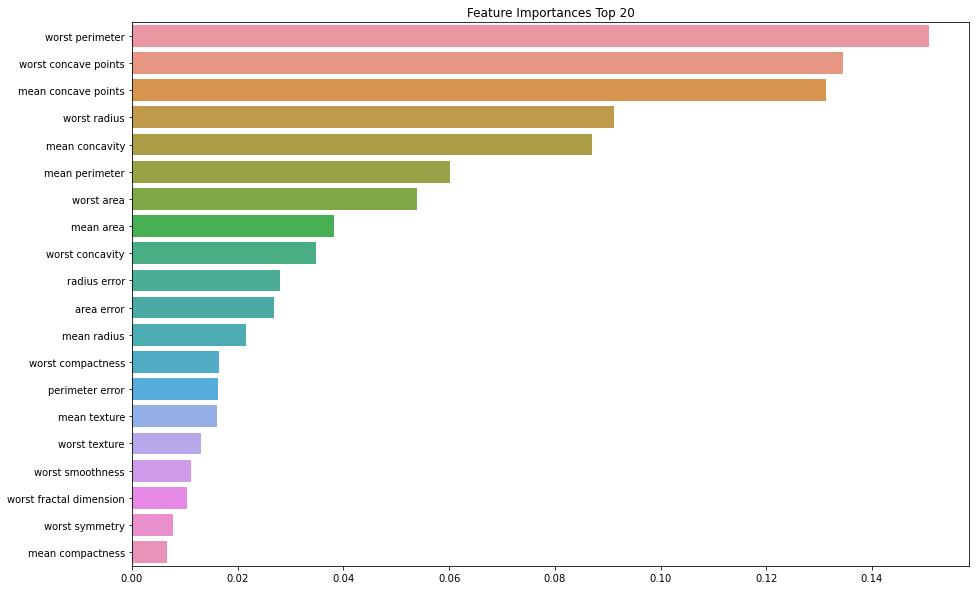

In [21]:
# For Unscaled Data
feature_importance_origin = pd.Series(model_origin.feature_importances_, index = X_train.columns).sort_values(ascending=False)[0:20]
plt.figure(figsize = (15,10))
sns.barplot(x = feature_importance_origin, y = feature_importance_origin.index)
plt.title("Feature Importances Top 20")
plt.show()

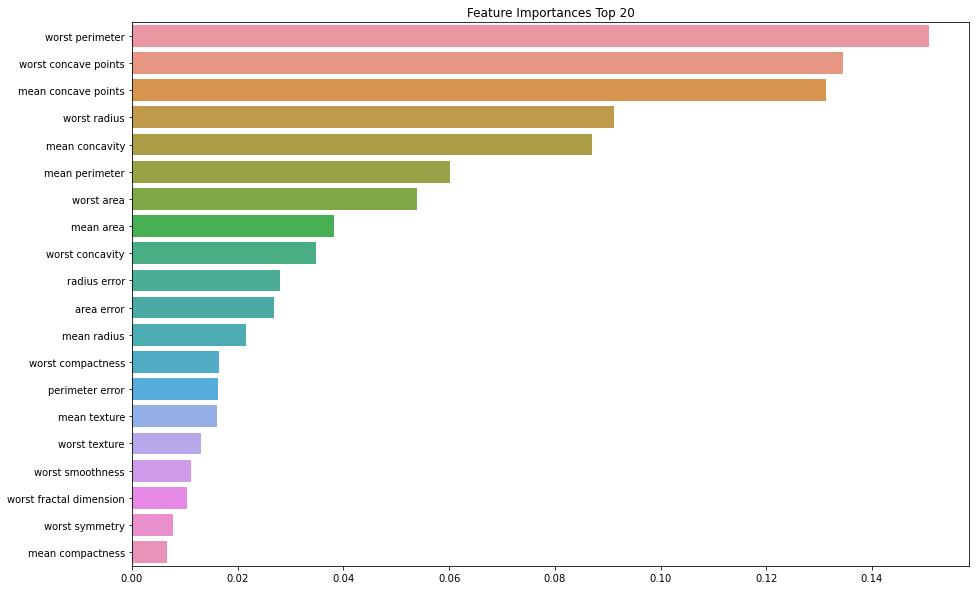

In [22]:
# For Scaled Data
feature_importance_scaled = pd.Series(model_scaled.feature_importances_, index=X_train.columns).sort_values(ascending=False)[0:20]
plt.figure(figsize=(15,10))
sns.barplot(x = feature_importance_scaled, y = feature_importance_scaled.index)
plt.title("Feature Importances Top 20")
plt.show()